Pt 1. Data Collection and Basic Data Analysis
------------------------------------------------------------------------

In [25]:
##Will be using pandas to collect and manage my data. It has my useful functions for viewing and proccessing data
import pandas as pd

#read the data from our dataset into a pandas dataframe
df = pd.read_csv('.\Dataset\happiness_data.csv')

##per the directions, we should not use the "year" attribute so I drop it
df = df.drop(columns = ['year'])

##print the number of attrributes and the name of each
print("---------------------------------Dataset Attributes--------------------------------------------")
data_labels = ', '.join(df.columns)
print(f"All Dataset Attributes Count: {len(df.columns)}")
print(f"All Dataset Attributes Names: {data_labels}\n")

#For now I will keep our label as a part of the dataset as we analyze it, but I will remove it later
print("----------------------------------Our attribute (soon-to-be-label) to Predict-------------------------------------------")
print("Label to Predict: Life Ladder\n")

#Next I just want to print the head of the data so we can just have a basic visualizawtion of the data we are looking at
print("----------------------------------Dataset Preview-------------------------------------------")
print(df.head(3))



---------------------------------Dataset Attributes--------------------------------------------
All Dataset Attributes Count: 10
All Dataset Attributes Names: Country name, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect

----------------------------------Our attribute (soon-to-be-label) to Predict-------------------------------------------
Label to Predict: Life Ladder

----------------------------------Dataset Preview-------------------------------------------
  Country name  Life Ladder  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices  Generosity  Perceptions of corruption  Positive affect  Negative affect
0  Afghanistan        3.724               7.370           0.451                              50.8                         0.718       0.168                      0.882            0.518            

In [26]:
##Now I am interested in finding what "types" of data I have (categorical vs continous) and how much. Basic useful data information
##our method to preprocess the data often depends on these (such as if I need to make one-hot-vectors for categorical features)

#this will hold all of the basic information I want to display
basic_information_df = df.dtypes.astype(str)

#I want to replace the data types with Categorical or Continuous.
#NOTE: It will not always align with data type, it just happened to do so here sop I replaced the data type with the data value. Another way is to just look at the data I printed above to know which is which
basic_information_df = basic_information_df.replace({"float64": "Continuous", "int64": "Categorical", "object": "Categorical"})
basic_information_df = basic_information_df.to_frame()

##Add a header to label what we are seeing in the dataframe when we print it
basic_information_df.reset_index(inplace = True)
basic_information_df.columns = ['Labels', 'Data-Value']

##help display the df better (nopthing improtant here computationally)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)


##For each Coninuous Data attribute, I want to find the min and max value, the median value, and the mean value. This will help me see if there are outliers, and the range of my data to help choose
##my standarization function.
##for each categorical  label, I just want to know how many categories there are.
basic_information_df['Min-Value'] = None
basic_information_df['Max-Value'] = None
basic_information_df['Median-Value'] = None
basic_information_df['Mean-Value'] = None
basic_information_df['#-Categories'] = None
for i, row in basic_information_df.iterrows():
    label = row['Labels']
    if row['Data-Value'] == 'Continuous':
        # Calculate Min, Median, and Mean for continuous data
        min_value = df[label].min()
        max_value = df[label].max()
        median_value = df[label].median()
        mean_value = df[label].mean()
        basic_information_df.at[i, 'Min-Value'] = min_value
        basic_information_df.at[i, 'Max-Value'] = max_value
        basic_information_df.at[i, 'Median-Value'] = median_value
        basic_information_df.at[i, 'Mean-Value'] = mean_value
    elif row['Data-Value'] == 'Categorical':
        # Count unique categories for categorical data
        unique_count = df[label].nunique()
        basic_information_df.at[i, '#-Categories'] = unique_count


##Just a little more basic information to print such as the total number of samples
print(basic_information_df)
print(f"Total Data Samples: {df.shape[0]}")



                             Labels   Data-Value Min-Value Max-Value Median-Value Mean-Value #-Categories
0                      Country name  Categorical      None      None         None       None          166
1                       Life Ladder   Continuous     2.375     8.019        5.386   5.466705         None
2                Log GDP per capita   Continuous     6.635    11.648         9.46   9.368453         None
3                    Social support   Continuous      0.29     0.987       0.8355   0.812552         None
4  Healthy life expectancy at birth   Continuous      32.3      77.1         65.2  63.359374         None
5      Freedom to make life choices   Continuous     0.258     0.985        0.763   0.742558         None
6                        Generosity   Continuous    -0.335     0.698      -0.0255   0.000103         None
7         Perceptions of corruption   Continuous     0.035     0.983        0.802   0.747125         None
8                   Positive affect   Continuo

Pt 1. Analysis
----------------------------------------------------
TOTAL DATA SAMPLES: 1949

TOTAL ATTRIBUTES (including our label): 10

CONTINUOUS ATTRIBUTES: Life-Ladder, Log GDP per Capita, Social Support, Healthy life expectancy at birth, Freedom to make life choixes, Generosity, Perceptions of corruption, Positive affect, negative affect.

CATEGORICAL ATTRIBUTES: Country Name

SUMMARY: In total, we have 1949 samples in our dataset. Each of those samples, has 9 attributes (including our Life-Ladder). This means that there are potentially 8 attributes that contribute to the Life-Ladder value. Of our dataset, every label is continuos, except for the Country Name, which contains 166 different categories. Because of this, we face a problem. We can either choose to include country name as a continuous variable, introducing bias as a result due to varying distances between each integer value; we can change Country Name to be One-Hot-Encoded, which will cause us to increase our attribute count by 165 (one for each new country minus one for the current Country name attrubute) causing a big increase in computation times and resources; or we can choose to drop the attribute completely, possibly losing a valuable correlation to our label to predict, meaning our model will lose potential accuracy as a result.

EDIT: After some googling, because I did not like any of my options regarding the categorical attribute Country Name because I do not have the best computer and I don't want to risk dropping the attribute, I found that there is another method that I could use called "target encoding" which essentially just uses each Country Name in relation to the "Mean" of the Target Label to create a continuous variable. This solved my resource problem, and also allows me to keppt the model simpler. I WILL APPLY THIS "TARGET ENCODING" In Pt 4

NOTE: Our attribute (soon-to-be-label) that we will be predicting is among the continuous attributes. This means that we will be predicting a continuous single continuous value using a regression model.



Pt 4. Train Test Split and "Target Encoding"
------------------------------------------------
I decided to do part 4 before the others because we should only really be analyzing the 
training data anyways to make decisions that will affect our model, otherwise, we are imposing bias towards the testing set, possible skewing our results to be better than what they actually are. I also target encode, which has to be done after splitting

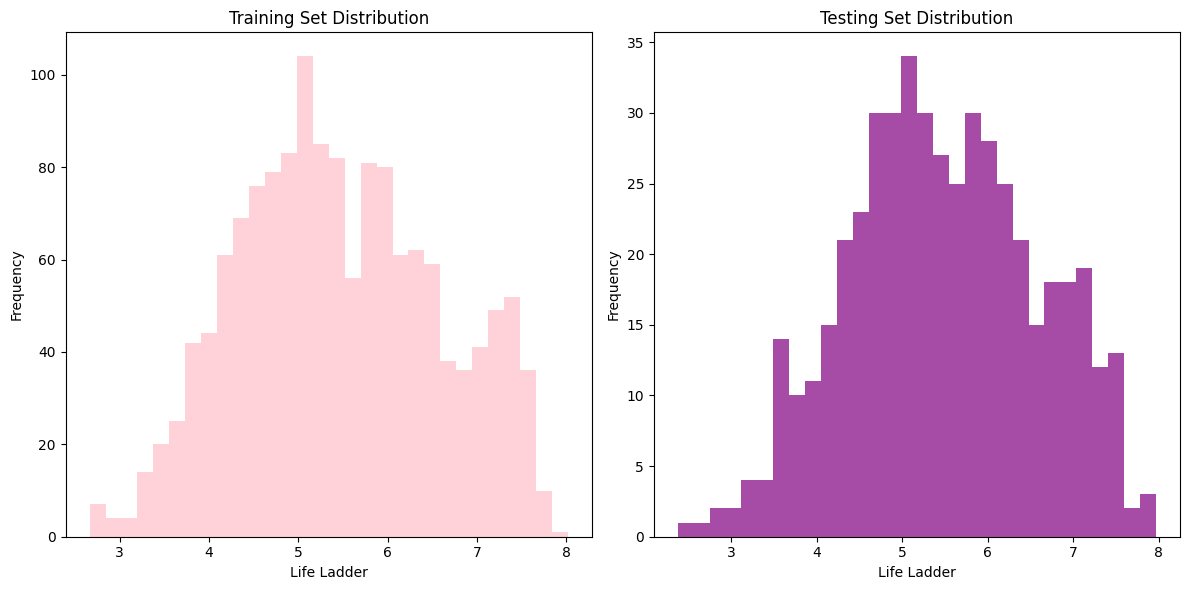

In [27]:
##First we want to split our training and testing data
#I will select 25% of the data for testing and 75% for training. There is a sklearn function for this.
from sklearn.model_selection import train_test_split

#I need to drop the life ladder and set it as my target
features = df.drop(columns=['Life Ladder'])
target = df['Life Ladder']

#Use our handy dandy scikit learn methiod. We can set a random state to shuffel the data and ensure reproducibility
#Below, I will ensure my split at the seed 122 is representative of the target set
#test size is 25 percent of the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=112)

#to make sure that the training and testing are representative, I want to plot a historgram of the frequency of life ladder
#values. If they are similar, they are representative of the whole. 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, label='Training Set', color='pink')
plt.title('Training Set Distribution')
plt.xlabel('Life Ladder')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, label='Testing Set', color='purple')
plt.title('Testing Set Distribution')
plt.xlabel('Life Ladder')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
##Next, I want to "target encode" the country name based on the training set
from category_encoders import TargetEncoder

#Because target encoding uses the target (Life ladder), we must add it to the dataframe
trained_combined = pd.concat([X_train, y_train], axis=1)

##create the Country name target encoder
country_name_target_encoder = TargetEncoder(cols=['Country name'])

##Create the continuous Country Name cvalues using target encoding
trained_combined['Country name'] = country_name_target_encoder.fit_transform(trained_combined['Country name'], trained_combined['Life Ladder'])

##Remove the targets back out of the training attributes
X_train = trained_combined.drop(columns=['Life Ladder'])


##showcase the new country name values
print(X_train.head(5))


      Country name  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices  Generosity  Perceptions of corruption  Positive affect  Negative affect
55        5.194136               9.111           0.680                             65.10                         0.441      -0.214                      0.882            0.543            0.411
869       5.427150               9.207           0.830                             66.20                         0.767      -0.046                        NaN            0.690            0.305
1393      5.382564               9.095           0.845                             62.00                         0.910      -0.083                      0.748            0.781            0.341
898       5.119100               8.219           0.765                             57.74                         0.819       0.172                      0.849            0.814            0.221
474       5.364486               9.489  

In [29]:
#I have to use this fit tyarget encode on my validation set also (but not update it to fit the enw testing set)
#otherwise there would be bias toward the testing set
X_test['Country name'] = country_name_target_encoder.transform(X_test['Country name'])

print(X_test.head(5))

      Country name  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices  Generosity  Perceptions of corruption  Positive affect  Negative affect
650       5.692854               8.850           0.830                             60.74                         0.663       0.172                      0.706            0.818            0.287
830       5.270487               8.209           0.667                             45.78                         0.760      -0.153                      0.902            0.604            0.186
1269      5.348296               8.403           0.780                             45.16                         0.584       0.119                      0.892            0.740            0.244
1110      5.711697               9.821           0.876                             66.38                         0.677      -0.128                      0.785            0.825            0.201
979       5.347758               9.681  

In [30]:
#Now just basic counts of the testing and training data to keep note of and for more validation that the split worked
print("--------------------Training Data-------------------")
print(f"Train Input Shape: {X_train.shape}")
print(f"Train Instances Count: {X_train.shape[0]}")
print(f"Train Output Shape: {y_train.shape[0]}")
print(f"Train Output Count: {y_train.shape[0]}")


print("\n--------------------Testing Data-------------------")
print(f"Test Input Shape: {X_test.shape}")
print(f"Test Instances Count: {X_test.shape[0]}")
print(f"Test Output Shape: {y_test.shape[0]}")
print(f"Test Output Count: {y_test.shape[0]}")


--------------------Training Data-------------------
Train Input Shape: (1461, 9)
Train Instances Count: 1461
Train Output Shape: 1461
Train Output Count: 1461

--------------------Testing Data-------------------
Test Input Shape: (488, 9)
Test Instances Count: 488
Test Output Shape: 488
Test Output Count: 488


Pt 4 Analysis
-----------------------------------

Data Splitting: To split my data, I chose a 25-75 split for testing data vs training data. There is an easy sklearn function for this. Once done however, I needed to see if the selected testing set contained similar distributions of the life ladder label values. I did this by plotting a histogram of each. After a few tries with different seeds, I settled on 112 which gives nearly identical histograms. They haave very similar shapes and breadths, even with valleys and peaks in the same areas.

Target Encoding: I used Target encoding to convert Country name, which was cateogrical, to a continuous attribute. We will see how this shapes up to the other attributes when we analyze each attribute further.


NOTE: GOING FORWARDS, I WILL BE DOING ALL DATA ANALYSIS ON THE TRAINING DATASET X_TRAIN TO REDUCE BIAS TOWARDS OUR TESTING SET

Pt 2. In Depth Data Anayasis
----------------------------------------------

In [31]:
##I want to didisplay the statistical values for each of the attributes
##There is a handy dandy pandas function for this
X_train.describe()

,Country name,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1461.000000,1435.000000,1451.000000,1422.000000,1442.000000,1398.000000,1383.000000,1446.000000,1449.000000
mean,5.471542,9.343905,0.811428,63.258715,0.745641,0.001740,0.740334,0.711183,0.270093
std,0.288703,1.172171,0.118732,7.662767,0.141126,0.162154,0.190313,0.105575,0.085462
min,4.958735,6.635000,0.290000,36.860000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,5.218206,8.398500,0.747000,58.000000,0.652000,-0.110000,0.681500,0.629000,0.206000
50%,5.436530,9.442000,0.831000,65.100000,0.766500,-0.022000,0.799000,0.723000,0.260000
75%,5.669126,10.372000,0.905000,68.700000,0.861000,0.090750,0.868000,0.798000,0.321000
max,6.145776,11.648000,0.987000,77.100000,0.984000,0.698000,0.983000,0.944000,0.643000


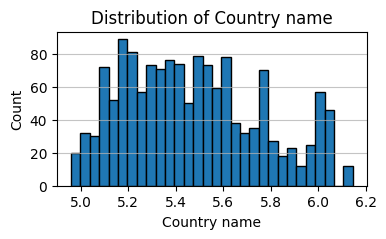

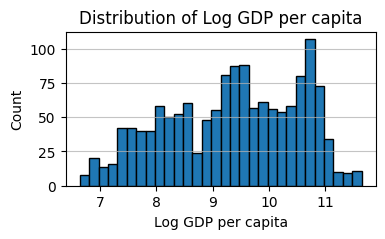

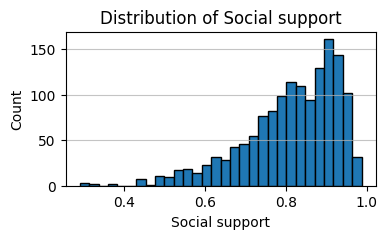

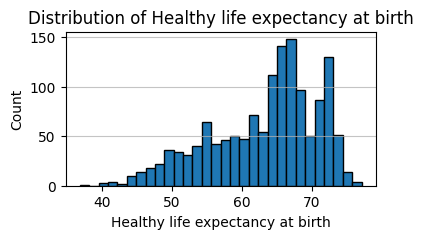

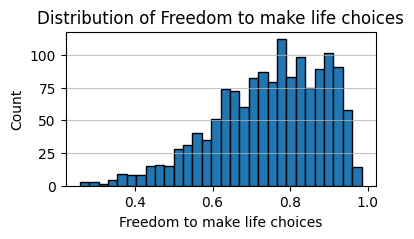

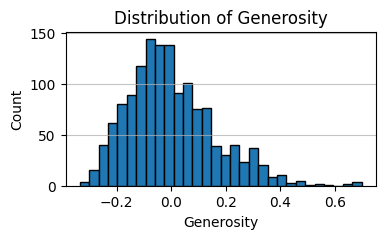

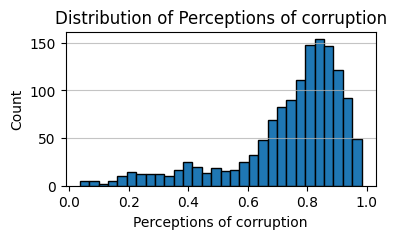

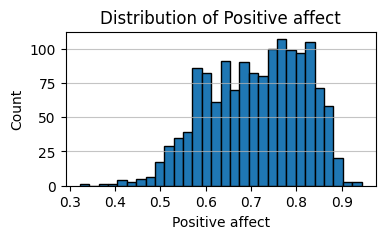

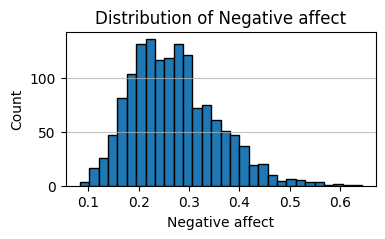

In [32]:
##Next I want to display histograms of the data to analyze whether they are linearly correlated to 
##our goal prediction (Life Ladder) and check for outliers and abnomalities from the bell curve we all know and love
import matplotlib.pyplot as plt

columns = X_train.select_dtypes(include=['float64', 'int64']).columns

##Just plot the historgram of each feature column. I will analyze each in the markdown below in teh analysis section
for column in columns:
    plt.figure(figsize=(4, 2))
    plt.hist(X_train[column], bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.75)
    plt.show() 


Pt 2. Analysis
-------------------
Summary: For each attribute, we have to analyze the distibution and the scale of its values to determine how we should treat the data (i.e should we normalize, standarize, etc). Below descibes the decision and key information for each attribute. We want all attributes to be roughly scaled between 0 and 1 to reduce the bias towards attributes with higher values.

1) Log GDP per Capita: This attribute barely follows a normal distribution. It is lower and the right adn left sides; however, there are a lot of dips and spikes deoniting a few noticeable outliers. Furthermore, the min and max values are appx. 6.5 and 11.5 respecively with a mean of 9.4. Becuase of this, I will standarize the data using z-score because it is less succeptible to outliers than normalization. I will also think about removing some outliers; however am hesitant due to the few number of data samples. This will also make a new range of 0-1 decreasing the impace of the larger values compared to other attributes.

2) Social Support: This attribute follows a normal distribution moderately well without many outliers; hwoever, it is heavily skewed to the right. The min value is .29 and the max value is .99 with a mean of .81. I will normalize these attributes because they appear to follow loosely a normal distribuition and so it is not affected by outliers as much.

3) Healthy Life Expectancy at Birth: This attribute follows a normal distribution moderately well. It is slightly skewed right, with a lot more values to the left of the center of the distribution than to the right. It also has a few very high peaks in the center of the distribution. The min value is 32.3 and the max value is 77.1 with a mean of 63.35. I will normalize these attributes because they appear to follow loosely a normal distribuition and so it is not affected by outliers as much.

4) Freedom to make Life choices: This attribute follows a normal distribution moderately well without many outliers; however, it is noticeably skewed to the right some. The min value is 0.25 and the max value is .98 with a mean of 0.74. I will normalize these attributes because they appear to follow loosely a normal distribuition and so it is not affected by outliers as much.

5) Generosity: This attribute also follow the bell curve moderately well; however, this time is skewed to the left a little; furthermore, it has a unique range compared to others. The min value is -0.33 and the max value is 0.69 with a mean of 0.0. I will normalize these attributes because they appear to follow loosely a normal distribuition and so it is not affected by outliers as much.

6) Perception of Corruption: This attribute does have a bell curve; however is exremely skewed to the right. The min value is 0.03 and the max value is 0.98 with a mean of 0.74 I will normalize these attributes because they appear to follow loosely a normal distribuition and so it is not affected by outliers as much.

7) Positive Effect: This attribute looks like a normal distribution wannabe, it looks like a plateau with some small counts on the left and right of it. The min value is 0.32 and the max value is 0.94 with a mean of 0.71. I will normalize these attributes because they appear to follow loosely a normal distribuition and so it is not affected by outliers as much.

8) Negative Effect: This attribute follows a normal distribution moderately well without many outliers; however, it is heavily skewed to the right. The min value is 0.083 and the max value is 0.705 with a mean of 0.268. I will normalize these attributes because they appear to follow loosely a normal distribuition and so it is not affected by outliers as much.

9) Country Name: If you imagine close enough (which I am), this histogram follows a bell curve very slighlty; however, it has an incredible number of high spikes. The min value is 4.95 and the max value is 6.14 with a mean of 5.47. Because of this, I will also be performing standardization on this attribute.


RESULTS:
Essentially, because nearly every attribute resembles a bell curve and appears somewhat follow a normal distribution in some way, shape, or form, I will standarize ALL of the attributes.



Pt 3. Data Relationships
---------------------------------
Finding Pearson Correlation Coeeficient of each Label and Plotting their Relationship to the Target Label (Life Ladder)

In [33]:
##There is also a handy dandy pd function for findinfg the pearson correlation for each label

##again, I will need to combine the X_test and y_test to make this sklearn function work
trained_combined = pd.concat([X_train, y_train], axis=1)

# Compute the pearson correlation for each label
df_without_categories = trained_combined.select_dtypes(include=['number'])
df_pcc_matrix = df_without_categories.corr(method='pearson')

pcc_life_ladder = df_pcc_matrix['Life Ladder']
print("\n---------------------------------Pearson Correlation Coefficient Matrix---------------------------------\n")
print(df_pcc_matrix)

print("\n---------------------------------Life Ladder PCC---------------------------------\n")
print(pcc_life_ladder)


---------------------------------Pearson Correlation Coefficient Matrix---------------------------------

                                  Country name  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices  Generosity  Perceptions of corruption  Positive affect  Negative affect  Life Ladder
Country name                          1.000000            0.825237        0.695593                          0.783650                      0.477828    0.219431                  -0.451658         0.512227        -0.245657     0.926806
Log GDP per capita                    0.825237            1.000000        0.684480                          0.855180                      0.367437    0.007108                  -0.347507         0.323323        -0.203525     0.795692
Social support                        0.695593            0.684480        1.000000                          0.613976                      0.415697    0.083416                  -0.228710         

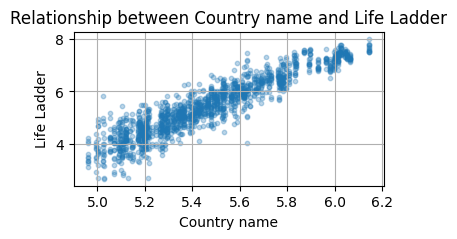

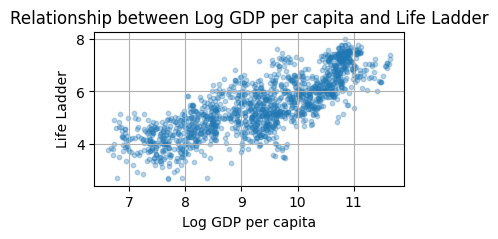

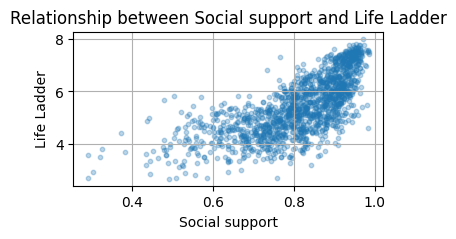

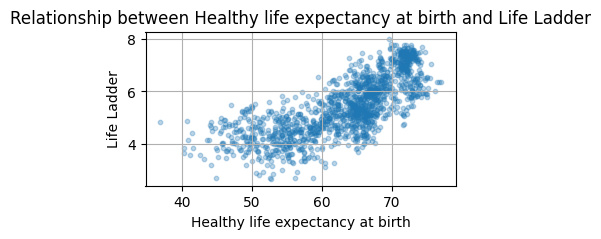

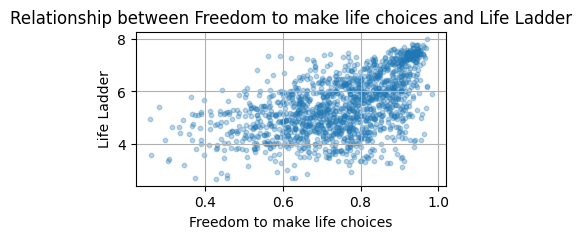

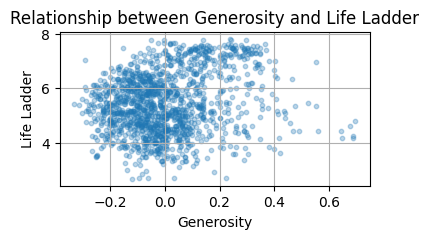

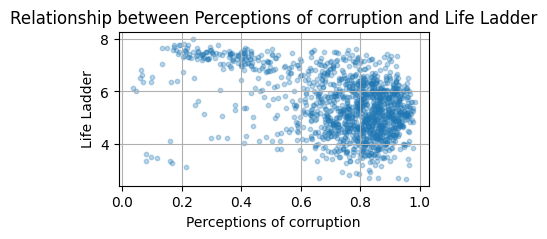

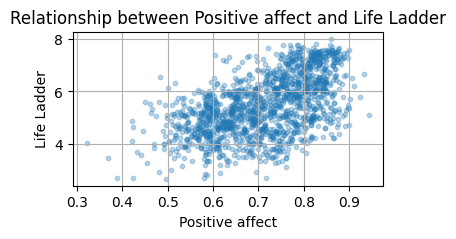

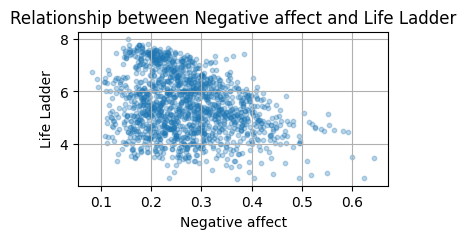

In [34]:
#Now I want to plot the relationship between key features and the life ladder

#create the scatterplot for each feature and its relationship to the life ladder
for column in df_without_categories.columns:
    if column == 'Life Ladder':  continue
    plt.figure(figsize=(4, 2))
    plt.scatter(df_without_categories[column], df_without_categories['Life Ladder'], alpha=0.3, s=10)
    plt.title(f'Relationship between {column} and Life Ladder')
    plt.xlabel(column)
    plt.ylabel('Life Ladder')
    plt.grid()
    plt.show()


Pt 3. Analysis
------------------------
NOTE: A LOT OF THE TIME YOU MAKE SCATTER PLOTS AND HISTORGRAMS AND MAKE DECISION BASED ON THOSE AND YOU ARE VERY UNSURE OF YOURSELF. I OFTEN WORRY "AM I DOING THIS RIGHT?", "AM i MAKING A MISTAKE", ETC. THIS IS NOT ONE OF THOSE TIMES, I PLOTTED THESE AND I KNOW I AM DOING IT RIGHT, LETS GO <3

Also, I just learned the these mardown cells can use html tags for formatting Yay!

Pearson Correlation Coefficient Summary: <br>
    &emsp;Country name                        0.926806<br>
    &emsp;Log GDP per capita                  0.795692<br>
    &emsp;Social support                      0.710031<br>
    &emsp;Healthy life expectancy at birth    0.751905<br>
    &emsp;Freedom to make life choices        0.517291<br>
    &emsp;Generosity                          0.204068<br>
    &emsp;Perceptions of corruption          -0.427548<br>
    &emsp;Positive affect                     0.537853<br>
    &emsp;Negative affect                    -0.288690<br>
    &emsp;Life Ladder                         1.000000<br>

Graph Matching:<br>
    <br>&emsp;Country name: The Data Points for the country name plot has a thin width and positive slope, showing strong 
        correlation with the Country Name to the Life Ladder, and verifying its high PCC value of .92 <br>
    <br>&emsp;Log GDP per capita: The Data Points for the this plot have a medium with and positive slope, showing 
        realtively strong correlation with the GDP to the Life Ladder, and verifying its high PCC value of .79<br>
    <br>&emsp;Social support: The Data Points for the this plot are less cohesive; however, life Ladder value does tend to 
        increase with an increase of Social Support. This veryfies is moderately high PCC value of .71<br>
    <br>&emsp;Healthy life expectancy at birth: The Data Points for the this plot look pretty similar to GDP, and the PCC 
        value also is similar at .75. This shows pretty strong linear correlation. <br>
    <br>&emsp;Freedom to make life choices: The Data Points for the this plot are very scattered. At the far right, higher freedom does haver Higher Life Ladder, but it does not follow the relationship closely. This verifyes the PCC value of .5<br>
    <br>&emsp;Generosity: The Data Points for the this plot are extremely scattered, it almost looks like the circle form the book and class slides. This verifyes the PCC value of .2<br>
    <br>&emsp;Perceptions of corruption: The Data Points for the this plot are extremely scattered; however not like a circle and not randomely. This maybe denotes some non-linear relationship, but does verify the PCC value of -.4<br>
    <br>&emsp;Positive affect: The Data Points for the this plot are extremely scattered; but do extremely loosly trend upward with Life Ladder. This verifies the PCC value of .53<br>
    <br>&emsp;Negative affect: The Data Points for the this plot are extremely scattered; and it is hard to see any trend at all. This verifies the PCC value of -.2<br>
    <br>&emsp;Life Ladder: Of course Life ladder is exactly correlated with itself. <br>


Final Pt 4 Remarks: Most attributes have some form of LINEAR relationship with Life Ladder. Country Name being by far the most notable. There are a few that do not have a Linear relationsip (but may have non-linear relationships). These are Negative Effect, Perceptions of Corruption, and Generosity. These are close to zero, which denotes no linear correlation. 


Pt 5. Attribute Standardization and Linear Regression Model
--------------------------------------------------------


In [35]:
import numpy as np

##I need to check ym data to see if there are any nan value, which will cause my error function to fail
nan_values = X_train.isna().any().any()
print(f'Nan Values? {nan_values}')

#Unfortunately there are so I will have to deal with them before I standarize them
from sklearn.impute import SimpleImputer

##I replace nan values with the mean of their attribute to fix math nan errors.
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

#NOTE: I could have just removed them, but there are a TON of instances, and I do not want to drop that much data

nan_values_after_imputing = np.isnan(X_train_imputed).any()
print(f'Nan Values After Imputing? {nan_values_after_imputing}')

Nan Values? True
Nan Values After Imputing? False


In [36]:
#I also have to impute my validation dataset in the same way as my training dataset (using the mean of the train dataset)
#NOTE: This is not fitting to the testing set, otherwise there would be bias
X_test_imputed = imputer.transform(X_test)

In [37]:

#First I still have to standarize all of my attributes that I mentioned in Part 2
from sklearn.preprocessing import StandardScaler

#create the standarizer
X_train_scaler = StandardScaler()

#fit the scaler to the training data (only the training data)
X_train_standardized = X_train_scaler.fit_transform(X_train_imputed)

nan_values_after_standarizing = np.isnan(X_train_standardized).any()
print(f'Nan Values After Imputing? {nan_values_after_standarizing}')

Nan Values After Imputing? False


In [38]:
#I also have to standarize my validation dataset in the same way as my training dataset
#NOTE: This is not fitting to the testing set, otherwise there would be bias
X_test_standarized = X_train_scaler.transform(X_test_imputed)

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error

#Now I will create my Linear regression model and train it on the normal equasion

##These are our splits. We have 3 folds.
kf = KFold(n_splits=3, shuffle=True, random_state=42)

#I need the prediction to be a np array
y_train_np = y_train.to_numpy()

#Iterate thoufh each split and train using the normal equasion.
#For each split, I show the root_mean_sqaured_error
fold = 1
total_rmse = 0
print("--------------------3 Fold Normal Equasion RMSE--------------------")
for train_index, val_index in kf.split(X_train_standardized):
    #Find the current fold
    X_train_fold, X_val_fold = X_train_standardized[train_index], X_train_standardized[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    #We need a bias term for the model (this allows for y-intercept learning). Every fold instance needs
    #a bias term so we just create a new column of ones. and add it to the trianing set
    X_train_bias = np.c_[np.ones(X_train_fold.shape[0]), X_train_fold]
    X_val_bias = np.c_[np.ones(X_val_fold.shape[0]), X_val_fold]

    #find the best params (i.e) fit the data for this fold.
    #This is the closed form for the normal equasion (Thank goodness I didn't actually need math)
    best_params = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train_fold)

    #now we should find the root_mean_square error for the fold by prediciting the validations portion
    y_val_fold_pred = X_val_bias.dot(best_params)

    #print the results
    rmse_results = root_mean_squared_error(y_val_fold, y_val_fold_pred)
    print(f'Root Mean Square Error for Split {fold}: {rmse_results}')
    fold+=1
    total_rmse+= rmse_results

print(f'Mean Square Error for All Splits: {round(total_rmse / 3,5)}')


#Now I want to use the normal eruasion on the whole training set and compare the results. Was one better than the other?
#It is literally just the smae thing as above, but on all the data
X_train_bias = np.c_[np.ones(X_train_standardized.shape[0]), X_train_standardized]
best_params = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train_np)
y_val_pred = X_train_bias.dot(best_params)
rmse_results = root_mean_squared_error(y_train_np, y_val_pred)


print("\n--------------------Normal Equasion On Entire Dataset RMSE--------------------")
print(f'Mean Square Error: {rmse_results}')

#Dang, my error is incredibly high.

--------------------3 Fold Normal Equasion RMSE--------------------
Root Mean Square Error for Split 1: 0.39665424579758624
Root Mean Square Error for Split 2: 0.4004934937182331
Root Mean Square Error for Split 3: 0.3964181676312921
Mean Square Error for All Splits: 0.39786

--------------------Normal Equasion On Entire Dataset RMSE--------------------
Mean Square Error: 0.39462152239760145


In [40]:
#Now I will use SGD. It is almost eaxctly like the Normal Equasion cell above 
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import SGDRegressor

#Now I will create my Linear regression model and train it on the normal equasion

##These are our splits. We have 3 folds.
kf = KFold(n_splits=3, shuffle=True, random_state=42)

#I need the prediction to be a np array
y_train_np = y_train.to_numpy()

#Iterate thoufh each split and train using SGD
#For each split, I show the root_mean_sqaured_error
fold = 1
total_rmse = 0
print("--------------------3 Fold Stochastic Gradient Descent RMSE--------------------")
for train_index, val_index in kf.split(X_train_standardized):
    #Find the current fold
    X_train_fold, X_val_fold = X_train_standardized[train_index], X_train_standardized[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    #There is a SGD Regressor class that sklearn already has.
    #It handles adding the bias
    model = SGDRegressor(max_iter=1000, tol=1e-3)   

    #fit the model to the data
    model.fit(X_train_fold, y_train_fold)

    #now we should find the root_mean_square error for the fold by prediciting the validations portion
    y_val_fold_pred = model.predict(X_val_fold)

    #print the results
    rmse_results = root_mean_squared_error(y_val_fold, y_val_fold_pred)
    print(f'Root Mean Square Error for Split {fold}: {rmse_results}')
    fold+=1
    total_rmse+= rmse_results

print(f'Mean Square Error for All Splits: {round(total_rmse / 3,5)}')


#Now I want to use the normal eruasion on the whole training set and compare the results. Was one better than the other?
#It is literally just the smae thing as above, but on all the data
model = SGDRegressor(max_iter=1000, tol=1e-3)   
model.fit(X_train_standardized, y_train_np)
y_val_pred = model.predict(X_test_standarized)
rmse_results = root_mean_squared_error(y_test, y_val_pred)


print("\n--------------------Stochastic Gradient Descent On Entire Dataset RMSE--------------------")
print(f'Mean Square Training Error: {rmse_results}')

--------------------3 Fold Stochastic Gradient Descent RMSE--------------------
Root Mean Square Error for Split 1: 0.3978188329624309
Root Mean Square Error for Split 2: 0.4014668732076999
Root Mean Square Error for Split 3: 0.3981008970896124
Mean Square Error for All Splits: 0.39913

--------------------Stochastic Gradient Descent On Entire Dataset RMSE--------------------
Mean Square Training Error: 0.4176279067908467


In [41]:
#Now I will use the Lass, elastic net, and ridge regularization.
#sklearn has prebuild regression models for each
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

##I need to try three different alpha values for each Regularization Technique
alpha_values = [0.01, 0.5, 1]

#three-fold cross validation
cross_validation_split = 3

##This sklearn function perform both cross validation and will select the best alpha value
ridge = RidgeCV(alphas = alpha_values, cv = cross_validation_split)

#fit the model
ridge.fit(X_train_standardized, y_train)

#find the score on teh validation set
train_score = ridge.score(X_train_standardized, y_train)
test_score = ridge.score(X_test_standarized, y_test)

print(f"Training score: {train_score}")
print(f"Test score: {test_score}")


Training score: 0.8759426582832844
Test score: 0.8567491992916049


In [42]:
#Now for Lasso Regression

##I need to try three different alpha values for each Regularization Technique
alpha_values = [0.01, 0.5, 1]

#three-fold cross validation
cross_validation_split = 3

##This sklearn function perform both cross validation and will select the best alpha value
lasso = LassoCV(alphas = alpha_values, cv = cross_validation_split)

#fit the model
lasso.fit(X_train_standardized, y_train)

#find the score on teh validation set
train_score = lasso.score(X_train_standardized, y_train)
test_score = lasso.score(X_test_standarized, y_test)

print(f"Training score: {train_score}")
print(f"Test score: {test_score}")

Training score: 0.8756799940017573
Test score: 0.8551341030471928


In [43]:
#Now for elastic net regularization

#We need l1 value which determines how similar or different to right and lasso regularization method we follow
l1_ratios = [0.1, 0.5, 0.9]

##I need to try three different alpha values for each Regularization Technique
alpha_values = [0.01, 0.5, 1]

#three-fold cross validation
cross_validation_split = 3

##This sklearn function perform both cross validation and will select the best alpha value
elastic = ElasticNetCV(alphas = alpha_values,l1_ratio = l1_ratios, cv = cross_validation_split)

#fit the model
elastic.fit(X_train_standardized, y_train)

#find the score on teh validation set
train_score = elastic.score(X_train_standardized, y_train)
test_score = elastic.score(X_test_standarized, y_test)

print(f"Training score: {train_score}")
print(f"Test score: {test_score}")

Training score: 0.8757109495959919
Test score: 0.8552973149466188


Pt 6. Polynomial Regression
-------------------------------------------

In [44]:
#I want to be able to use the Lasso,Ridge, adn Elastic Net functions so 
#in order to use them, I need to convert all my features into polynomial features
from sklearn.preprocessing import PolynomialFeatures

#Slect teh degree I want the polynomial to be
degree = 2

#Create the opbject to modifyt my attributes
polynomial = PolynomialFeatures(degree=degree)

#fit it on teh training data
X_train_poly = polynomial.fit_transform(X_train_standardized)

In [45]:
#I need to use the transformer created on the testing set as well
#Note, I am note fitting it to the testing set
X_test_poly = polynomial.transform(X_test_standarized)

In [46]:
##Now I can perform polynomial regression using Lasso, Elastic, and Ridge

##I need to try three different alpha values for each Regularization Technique
alpha_values = [0.01, 0.5, 1]

#three-fold cross validation
cross_validation_split = 3

##This sklearn function perform both cross validation and will select the best alpha value
ridge = RidgeCV(alphas = alpha_values, cv = cross_validation_split)

#fit the model
ridge.fit(X_train_poly, y_train)

#find the score on teh validation set
train_score = ridge.score(X_train_poly, y_train)
test_score = ridge.score(X_test_poly, y_test)

print(f'Best alpha for ridge: {ridge.alpha_}')
print(f"Training score of best alpha: {train_score}")
print(f"Test score of best alpha: {test_score}")

Best alpha for ridge: 1.0
Training score of best alpha: 0.8858538597923997
Test score of best alpha: 0.8691584276039366


In [47]:
#Lassso Polynomial Regression

##I need to try three different alpha values for each Regularization Technique
alpha_values = [0.01, 0.5, 1]

#three-fold cross validation
cross_validation_split = 3

##This sklearn function perform both cross validation and will select the best alpha value
lasso = LassoCV(alphas = alpha_values, cv = cross_validation_split)

#fit the model
lasso.fit(X_train_poly, y_train)

#find the score on teh validation set
train_score = lasso.score(X_train_poly, y_train)
test_score = lasso.score(X_test_poly, y_test)

print(f'Best alpha for ridge: {lasso.alpha_}')
print(f"Training score of best alpha: {train_score}")
print(f"Test score of best alpha: {test_score}")

Best alpha for ridge: 0.01
Training score of best alpha: 0.8801595121700472
Test score of best alpha: 0.8608871146902425


In [48]:
#Elastic Net
#I also need to try some l1 values
l1_ratios = [0.1, 0.5, 0.9]

##I need to try three different alpha values for each Regularization Technique
alpha_values = [0.01, 0.5, 1]

#three-fold cross validation
cross_validation_split = 3

##This sklearn function perform both cross validation and will select the best alpha value
elastic = ElasticNetCV(alphas = alpha_values, cv = cross_validation_split)

#fit the model
elastic.fit(X_train_poly, y_train)

#find the score on teh validation set
train_score = elastic.score(X_train_poly, y_train)
test_score = elastic.score(X_test_poly, y_test)

print(f'Best alpha for ridge: {elastic.alpha_}')
print(f"Training score of best alpha: {train_score}")
print(f"Test score of best alpha: {test_score}")

Best alpha for ridge: 0.01
Training score of best alpha: 0.882773040064609
Test score of best alpha: 0.8638262957097689


OUTSIDE SOURCES



https://www.kaggle.com/code/ryanholbrook/target-encoding
Chat GPT
https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html